Testlauf ergab:
price_change_pct    1.000000
tx_weekday          0.041468
vwap_before         0.003384
price_before        0.002997
tx_hour            -0.020932
vol_before         -0.033711
signed_amount      -0.083377
Name: price_change_pct, dtype: float64

Daten geladen: 1145 Zeilen
Verwendete Features: ['signed_amount', 'tx_hour', 'tx_weekday', 'price_before', 'vol_before', 'vol_t', 'minute']


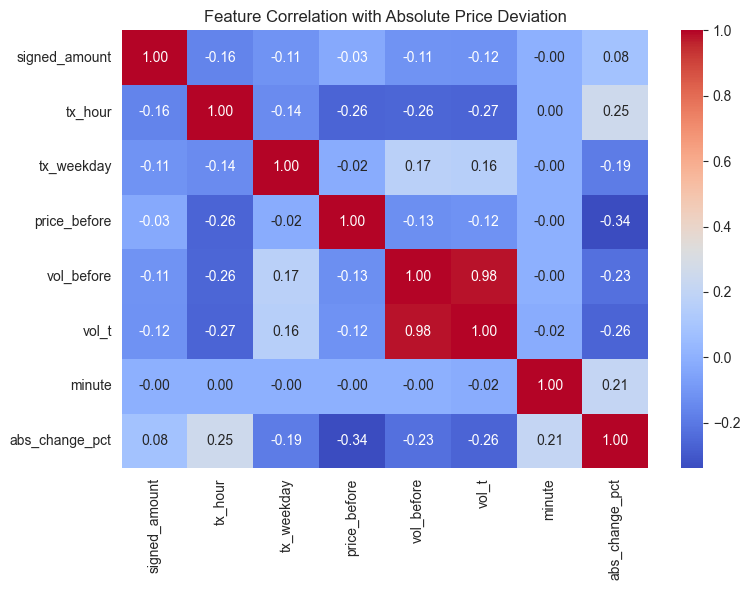


Top Korrelationen mit abs_change_pct:
abs_change_pct    1.000000
tx_hour           0.254382
minute            0.211460
signed_amount     0.080745
tx_weekday       -0.192507
vol_before       -0.229053
vol_t            -0.264432
price_before     -0.339518
Name: abs_change_pct, dtype: float64

=== AAPL ===
abs_change_pct    1.000000
minute            0.224271
tx_hour           0.156876
signed_amount     0.018192
price_before     -0.063868
vol_before       -0.273627
tx_weekday       -0.282580
vol_t            -0.321438
Name: abs_change_pct, dtype: float64

=== AMZN ===
abs_change_pct    1.000000
tx_hour           0.443350
minute            0.315115
signed_amount     0.108321
tx_weekday       -0.359149
price_before     -0.462930
vol_t            -0.474240
vol_before       -0.485679
Name: abs_change_pct, dtype: float64

=== MSFT ===
abs_change_pct    1.000000
tx_hour           0.387858
minute            0.104331
signed_amount     0.021282
tx_weekday       -0.225724
vol_before       -0.26488

In [2]:
# 06_feature_selection_senator.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =========================
# 1. Daten laden (Event Study!)
# =========================
data_path = r"C:\Users\User\PycharmProjects\Project-Trading\data\senator_event_study.parquet"
if not os.path.exists(data_path):
    raise FileNotFoundError("Event-Study Datei fehlt")

df = pd.read_parquet(data_path)
print(f"Daten geladen: {len(df)} Zeilen")

# =========================
# 2. Target & Features
# =========================
target = 'abs_change_pct'

features = [
    'signed_amount',
    'tx_hour',
    'tx_weekday',
    'price_before',
    'vol_before',
    'vol_t',
    'minute'
]

# nur vorhandene Features
features = [f for f in features if f in df.columns]

print("Verwendete Features:", features)

# =========================
# 3. Korrelationen (global)
# =========================
plt.figure(figsize=(8, 6))
corr = df[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Absolute Price Deviation')
plt.tight_layout()

os.makedirs('images', exist_ok=True)
plt.savefig('images/06_corr_abs_change.png', dpi=150)
plt.show()

print("\nTop Korrelationen mit abs_change_pct:")
print(corr[target].sort_values(ascending=False))


# 4. Pro Aktie analysieren (vom review Feedback)

for ticker, df_t in df.groupby('Ticker'):
    if len(df_t) < 20:
        continue

    print(f"\n=== {ticker} ===")
    corr_t = df_t[features + [target]].corr()
    print(corr_t[target].sort_values(ascending=False))
